In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import os

In [2]:
names_of_directory = ["alt.atheism","comp.graphics","comp.os.ms-windows.misc","comp.sys.ibm.pc.hardware","comp.sys.mac.hardware","comp.windows.x","misc.forsale","rec.autos","rec.motorcycles","rec.sport.baseball","rec.sport.hockey","sci.crypt","sci.electronics","sci.med","sci.space","soc.religion.christian","talk.politics.guns","talk.politics.mideast","talk.politics.misc","talk.religion.misc"]
words = {}
file = open("Stop_words.txt")
f = file.read()
stop_words = f.split("\n")
stop_words = set(stop_words)
def read_file(path):
    with open(path) as f:
        for line in f:
            for word in line.split():
                if word in stop_words:
                    continue
                if(words.get(word,0)==0):
                    words[word]=1
                else:
                    words[word]+=1
j=0
for path_extension in names_of_directory:
    path = "C:\\Users\\Masood\\Ackerman\\Mini_newspaper\\mini_newsgroups\\" + path_extension
    os.chdir(path)
    l = os.listdir()
    for i in l:
        file_path = f"{path}\{i}"
        j+=1
        read_file(file_path)
os.chdir(r"C:\Users\Masood\Ackerman")
print(len(words.keys()))
print(j)

99333
2000


                           *SORTING DICTIONARY BY VALUES*

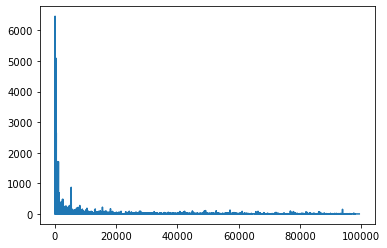

In [3]:
from matplotlib.axis import Axis
words_new = {}
x = np.arange(len(words.keys()))
plt.plot(x,words.values())

plt.show()
words = {k:v for k,v in sorted(words.items(),key = lambda key_value:key_value[1],reverse = True)}
cnt=0
for i in words:
    if(cnt>4000):
        break
    words_new[i] = words[i]
    cnt+=1

In [4]:
type(len(words_new.keys()))
col = list(words_new.keys())
x = np.zeros((2000,len(words_new.keys())))
X = pd.DataFrame(x,columns = col)
X.shape

(2000, 4001)

In [5]:
j=0
output=0
Y = []
def read_file(path):
    with open(path) as f:
        for line in f:
            for word in line.split():
                if word in X.columns:
                    X.loc[j][word]+=1
        Y.append(output)
                
                

for path_extension in names_of_directory:
    path = "C:\\Users\\Masood\\Ackerman\\Mini_newspaper\\mini_newsgroups\\" + path_extension
    os.chdir(path)
    l = os.listdir()
    for i in l:
        file_path = f"{path}\{i}"
        read_file(file_path)
        j+=1
    output+=1
os.chdir(r"C:\Users\Masood\Ackerman")
Y = np.array(Y)
print(X.columns)
X = np.array(X)

Index(['I', '>', 'The', 'From:', 'Subject:', 'Date:', 'Newsgroups:',
       'Message-ID:', 'Path:', 'Lines:',
       ...
       'key,', 'limits', '(Gordon', 'SIMMS', 'upset', 'dept.', 'condition,',
       'inner', 'adapter', 'ports'],
      dtype='object', length=4001)


In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0)
clf = MultinomialNB()
clf.fit(X_train,Y_train)
Y_pre = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,Y_pre))
print(classification_report(Y_test,Y_pre))

[[24  0  0  0  0  0  1  0  3  0  0  0  0  0  0  0  1  0  0  2]
 [ 0  9  1  4  2  0  2  0  2  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 22  5  0  0  3  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 16  1  0  3  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3 19  0  1  0  0  1  0  0  0  0  1  0  0  0  0  0]
 [ 0  2  3  2  1 17  2  0  0  0  0  0  0  1  0  0  0  0  0  1]
 [ 0  0  0  1  1  0 19  0  0  0  1  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  1  0  0  3 20  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1 19  3  0  0  0  1  1  0  0  0  0]
 [ 0  0  1  0  0  0  1  2  1  1 12  0  0  0  0  0  2  0  0  0]
 [ 0  0  1  0  1  0  3  0  2  0  0 19  0  0  0  0  0  1  0  1]
 [ 0  0  3  5  1  0  2  1  4  1  0  0  6  0  1  0  1  0  0  0]
 [ 0  0  1  0  1  0  1  1  2  0  0  0  1 17  0  0  0  0  1  0]
 [ 1  0  0  1  0  0  0  1  0  0  0  0  1  1 23  1  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 22  1  0

In [7]:
def fit(X_train,Y_train):
    result = {}
    classes = set(Y_train)
    result["total_data"] = len(Y_train)
    for curr_class in classes:
        result[curr_class] = {}
        X_train_new = X_train[Y_train==curr_class]
        result[curr_class]["total_words"] = X_train_new.sum()
        result[curr_class]["total_count"] = len(Y_train[Y_train==curr_class])
        feature_number = X_train.shape[1]
        for curr_feature in range(1,feature_number+1):
            result[curr_class][curr_feature] = X_train_new[:,curr_feature-1].sum()
    
    return result


In [8]:
def probability(result,x,ai):
    
    p_ai = np.log(result[ai]["total_count"]) - np.log(result["total_data"])
    total_words = len(x)
    curr_word = 1
    for word in x:
        curr_prob = word*(np.log((result[ai][curr_word]) + 1) - np.log((result[ai]["total_words"]) + total_words))
        p_ai+=curr_prob
        curr_word+=1
    return p_ai

In [9]:
def PredictSinglePoint(result,x):
    classes = result.keys()
    best_p = -100000
    best_class = -1
    first_run = True
    
    for curr_class in classes:
        if(curr_class=="total_data"):
            continue
        curr_probability = probability(result,x,curr_class)
        if(first_run or best_p<curr_probability):
            best_p = curr_probability
            best_class = curr_class
            first_run = False
    return best_class

In [10]:
def predict(result, X_test):
    Y_pred = []
    for x in X_test:
        x_class = PredictSinglePoint(result,x)
        Y_pred.append(x_class)
    Y_pred = np.array(Y_pred)
    
    return Y_pred

In [11]:
def score(Y_pre,Y_test):
    count=0
    
    for i in range(len(Y_pre)):
        if(Y_pre[i]==Y_test[i]):
            count+=1
    return count/len(Y_pre)
        

In [16]:
result = fit(X_train,Y_train)

In [13]:
Y_pre_bruh = predict(result,X_test)
print(confusion_matrix(Y_test,Y_pre_bruh))
print(classification_report(Y_test,Y_pre_bruh))

[[24  0  0  0  0  0  1  0  3  0  0  0  0  0  0  0  1  0  0  2]
 [ 0  9  1  4  2  0  2  0  2  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 22  5  0  0  3  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 16  1  0  3  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3 19  0  1  0  0  1  0  0  0  0  1  0  0  0  0  0]
 [ 0  2  3  2  1 17  2  0  0  0  0  0  0  1  0  0  0  0  0  1]
 [ 0  0  0  1  1  0 19  0  0  0  1  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  1  0  0  3 20  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1 19  3  0  0  0  1  1  0  0  0  0]
 [ 0  0  1  0  0  0  1  2  1  1 12  0  0  0  0  0  2  0  0  0]
 [ 0  0  1  0  1  0  3  0  2  0  0 19  0  0  0  0  0  1  0  1]
 [ 0  0  3  5  1  0  2  1  4  1  0  0  6  0  1  0  1  0  0  0]
 [ 0  0  1  0  1  0  1  1  2  0  0  0  1 17  0  0  0  0  1  0]
 [ 1  0  0  1  0  0  0  1  0  0  0  0  1  1 23  1  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 22  1  0

In [14]:
print("Score of our NB : ",score(Y_pre_bruh,Y_test))
print("Score of inbuilt classifier : ",clf.score(X_test,Y_test))

Score of our NB :  0.674
Score of inbuilt classifier :  0.674


                       ALSO DOING COMPARISON WITH LOGISTIC REGRESSION CLASSIFIER

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train,Y_train)
Y_pre = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,Y_pre))
print(classification_report(Y_test,Y_pre))

[[27  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  3]
 [ 0 16  0  1  0  0  0  0  0  0  0  1  2  0  0  0  0  0  0  1]
 [ 1  3 23  2  1  0  1  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0 18  0  1  1  0  1  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  1  0  2 19  0  2  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  1 27  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0 20  0  0  0  1  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  2 21  0  0  0  0  1  0  0  0  0  0  1  0]
 [ 0  0  0  0  1  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0 21  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  3  0  0  0  0 21  0  0  0  0  0  0  0  3]
 [ 0  1  0  1  0  0  1  0  0  0  0  0 20  0  1  0  0  0  0  1]
 [ 0  0  0  1  0  0  0  2  0  0  0  0  0 20  0  0  0  0  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2 26  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 24  0  0

In [20]:
n_cpu = os.cpu_count()
print(n_cpu)

8
